In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import math

In [2]:
def calculate_relative_humidity(temp_f, dew_point_f):
    """
    Calculate the relative humidity given temperature and dew point in Fahrenheit.

    Parameters:
    temp_f (float): Air temperature in degrees Fahrenheit.
    dew_point_f (float): Dew point temperature in degrees Fahrenheit.

    Returns:
    float: Relative humidity as a percentage.
    """
    # Convert Fahrenheit to Celsius
    temp_c = (temp_f - 32) / 1.8
    dew_point_c = (dew_point_f - 32) / 1.8
    
    # Constants for the Magnus formula
    A = 17.625
    B = 243.04
    
    # Saturation vapor pressure calculations
    e_s = math.exp((A * dew_point_c) / (B + dew_point_c))
    e_t = math.exp((A * temp_c) / (B + temp_c))
    
    # Relative humidity formula
    rh = 100 * (e_s / e_t)
    
    return rh


In [3]:
# Load the Excel file
file_name = "Maryland Temp and Humidity.xlsx"
sheets = ["Summer2021", "Winter2021", "Summer2022", "Winter2022", "Summer2023", "Winter2023"]

# Initialize lists to store temperature, dew point, and relative humidity values
temperature_lists = []
dew_point_lists = []
relative_humidity_lists = []

# Process each sheet
for sheet in sheets:
    # Read the data from the sheet
    data = pd.read_excel(file_name, sheet_name=sheet)
    
    # Extract temperature and dew point columns
    temp_values = data['TEMP'].tolist()
    dew_point_values = data['DEWP'].tolist()
    
    # Store temperature and dew point values in lists
    temperature_lists.append(temp_values)
    dew_point_lists.append(dew_point_values)
    
    # Calculate relative humidity for the sheet
    rh_values = [round(calculate_relative_humidity(temp, dew_point), 2) for temp, dew_point in zip(temp_values, dew_point_values)]
    
    # Store relative humidity values in the list
    relative_humidity_lists.append(rh_values)

# Now you have 6 temperature lists and 6 relative humidity lists
for i, sheet in enumerate(sheets):
    print(f"{sheet} - Temperature Values: {temperature_lists[i][:5]}")  # Display first 5 temperatures
    print(f"{sheet} - Relative Humidity Values: {relative_humidity_lists[i][:5]}")  # Display first 5 RH values

Summer2021 - Temperature Values: [42.6, 35.9, 39.7, 51.2, 56.5]
Summer2021 - Relative Humidity Values: [56.71, 35.66, 28.22, 35.19, 31.64]
Winter2021 - Temperature Values: [53.7, 44.8, 41.0, 41.0, 39.2]
Winter2021 - Relative Humidity Values: [56.5, 90.53, 68.14, 67.6, 63.11]
Summer2022 - Temperature Values: [55.8, 45.8, 49.1, 45.3, 49.2]
Summer2022 - Relative Humidity Values: [51.32, 36.71, 49.49, 38.54, 68.56]
Winter2022 - Temperature Values: [63.2, 58.1, 55.2, 56.8, 66.8]
Winter2022 - Relative Humidity Values: [81.37, 74.95, 75.52, 81.8, 76.02]
Summer2023 - Temperature Values: [64.8, 50.8, 49.5, 63.6, 70.3]
Summer2023 - Relative Humidity Values: [71.84, 43.54, 55.45, 57.67, 65.98]
Winter2023 - Temperature Values: [41.2, 40.8, 41.4, 47.6, 52.0]
Winter2023 - Relative Humidity Values: [63.63, 50.45, 59.14, 53.63, 60.37]


In [4]:
def calculate_statistics(data):
    """
    Calculate the minimum, Q1, median, Q3, maximum, and range for a dataset.
    :param data: List of numerical values
    :return: Dictionary containing statistical values
    """
    q1 = np.percentile(data, 25)
    median = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    return {
        "min": np.min(data),
        "q1": q1,
        "median": median,
        "q3": q3,
        "max": np.max(data),
        "range": np.max(data) - np.min(data)  # Add range calculation here
    }


In [5]:
def plot_boxplots_with_labels(data_lists, labels, title, ylabel, color, filename):
    """
    Create and save box plots for the given data with labels for statistical metrics.
    :param data_lists: List of datasets to plot
    :param labels: Labels for each dataset
    :param title: Title of the plot
    :param ylabel: Y-axis label
    :param color: Color of the box plots
    :param filename: File name to save the plot
    """
    plt.figure(figsize=(12, 8))
    box = plt.boxplot(data_lists, patch_artist=True, boxprops=dict(facecolor=color))

    # Annotate statistics for each dataset
    for i, data in enumerate(data_lists, start=1):
        stats = calculate_statistics(data)
        plt.text(i, stats["min"], f'Min: {stats["min"]:.1f}', ha='center', va='top', fontsize=8, color='blue')
        plt.text(i, stats["max"], f'Max: {stats["max"]:.1f}', ha='center', va='bottom', fontsize=8, color='red')
        plt.text(i, stats["q1"], f'Q1: {stats["q1"]:.1f}', ha='center', va='center', fontsize=8, color='purple')
        plt.text(i, stats["q3"], f'Q3: {stats["q3"]:.1f}', ha='center', va='center', fontsize=8, color='purple')
        
        # Offset median and range labels for clarity
        plt.text(i, stats["median"] - 0.5, f'Median: {stats["median"]:.1f}', ha='center', va='center', fontsize=8, color='green')
        plt.text(i, stats["median"] + 0.5, f'Range: {stats["range"]:.1f}', ha='center', va='center', fontsize=8, color='brown')

    plt.xticks(range(1, len(labels) + 1), labels, rotation=15)
    plt.title(title)
    plt.xlabel("Seasons")
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


In [6]:
# Calculate statistics for each dataset
temperature_statistics = [calculate_statistics(data) for data in temperature_lists]
humidity_statistics = [calculate_statistics(data) for data in relative_humidity_lists]



In [7]:
# Summer R values
summer21_R_values = [0.911, 0.882, 0.893, 0.873, 1.079, 1.001, 0.836, 0.866, 1.036, 1.107]
summer22_R_values = [1.232, 1.231, 1.207, 1.150, 1.256, 1.196, 1.179, 1.314, 1.985, 1.220]
summer23_R_values = [0.939, 1.015, 1.007, 0.949, 1.028, 0.916, 0.884, 1.099, 1.019, 1.068]

# Winter R values
winter21_R_values = [1.577, 1.955, 1.694, 1.399, 1.839, 1.729, 1.535, 1.624, 2.687, 1.667]
winter22_R_values = [1.093, 1.107, 1.082, 1.052, 1.096, 1.086, 1.068, 1.160, 1.383, 1.058]
winter23_R_values = [1.109, 1.084, 1.070, 1.033, 1.132, 1.150, 1.063, 1.120, 1.023, 1.131]


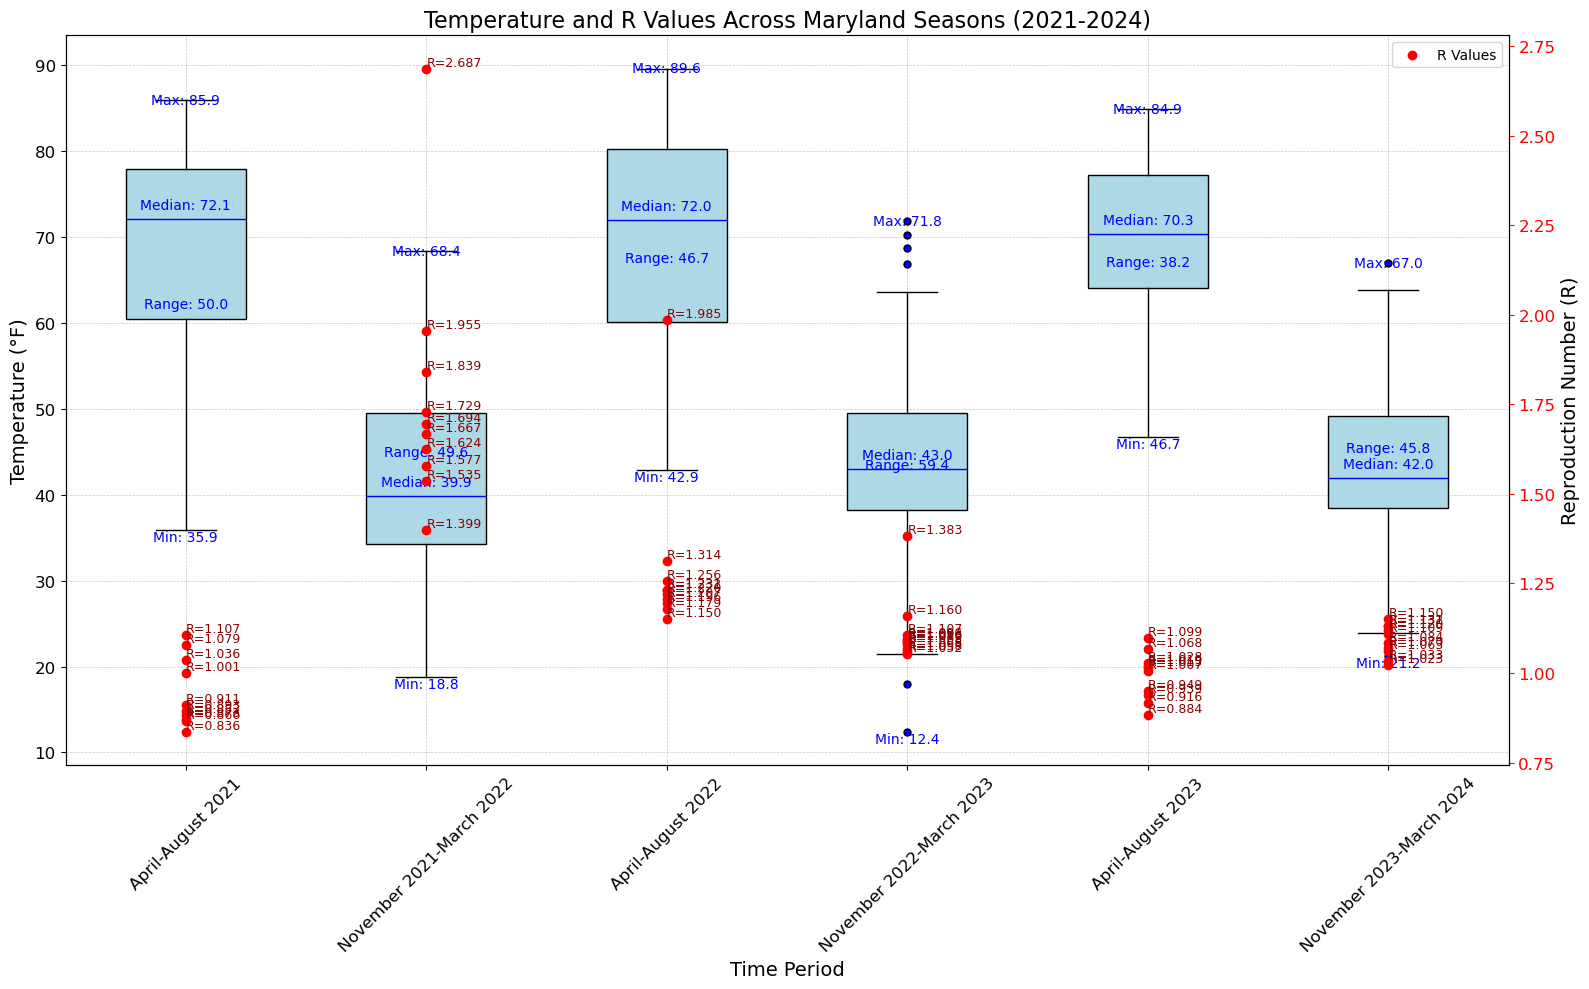

In [8]:
R_values = [
    summer21_R_values,
    winter21_R_values,
    summer22_R_values,
    winter22_R_values,
    summer23_R_values,
    winter23_R_values
]

labels = [
    "April-August 2021",
    "November 2021-March 2022",
    "April-August 2022",
    "November 2022-March 2023",
    "April-August 2023",
    "November 2023-March 2024"
]

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 10))  # Increased figure size for better visibility

# Boxplots for temperature data
box = ax1.boxplot(
    temperature_lists,
    patch_artist=True,
    labels=labels,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='blue'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='blue', marker='o', markersize=5)
)
ax1.set_ylabel("Temperature (°F)", fontsize=14)
ax1.set_xlabel("Time Period", fontsize=14)
ax1.set_title("Temperature and R Values Across Maryland Seasons (2021-2024)", fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Add a grid to the left axis
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate temperature statistics
for i, stats in enumerate(temperature_statistics):
    x = i + 1  # x-coordinate for the corresponding boxplot
    # Adjust position of median and range to avoid overlap
    ax1.text(x, stats["min"], f'Min: {stats["min"]:.1f}', ha='center', va='top', fontsize=10, color='blue')
    
    # Move the median and range slightly to avoid overlap
    ax1.text(x, stats["median"] + 0.8, f'Median: {stats["median"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')
    ax1.text(x, stats["max"] - 0.8, f'Max: {stats["max"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')
    ax1.text(x, (stats["min"] + stats["max"]) / 2 + 0.5, f'Range: {stats["range"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')

# Secondary axis for R values
ax2 = ax1.twinx()
for i, r_vals in enumerate(R_values):
    # Plot R values as orange points for each time period
    x_positions = [i + 1] * len(r_vals)  # Align with boxplot positions
    ax2.scatter(x_positions, r_vals, color='red', label='R Values' if i == 0 else "")

    # Annotate each R value
    for x, y in zip(x_positions, r_vals):
        ax2.text(
            x, y, f'R={y:.3f}',  # Added "R=" prefix to the value
            fontsize=9, 
            color='darkred', 
            ha='left', 
            va='bottom'
        )

ax2.set_ylabel("Reproduction Number (R)", fontsize=14)
ax2.tick_params(axis='y', colors='red', labelsize=12)

# Add grid to the secondary y-axis (optional)
ax2.grid(visible=False)  # Disable grid for R-values to avoid clutter; enable if desired

# Add legends and layout adjustments
ax2.legend(loc='upper right')
plt.tight_layout()

# Save and display the plot
plt.savefig("Temperature_and_R_Values_Larger_Grid.png", dpi=300)
plt.show()

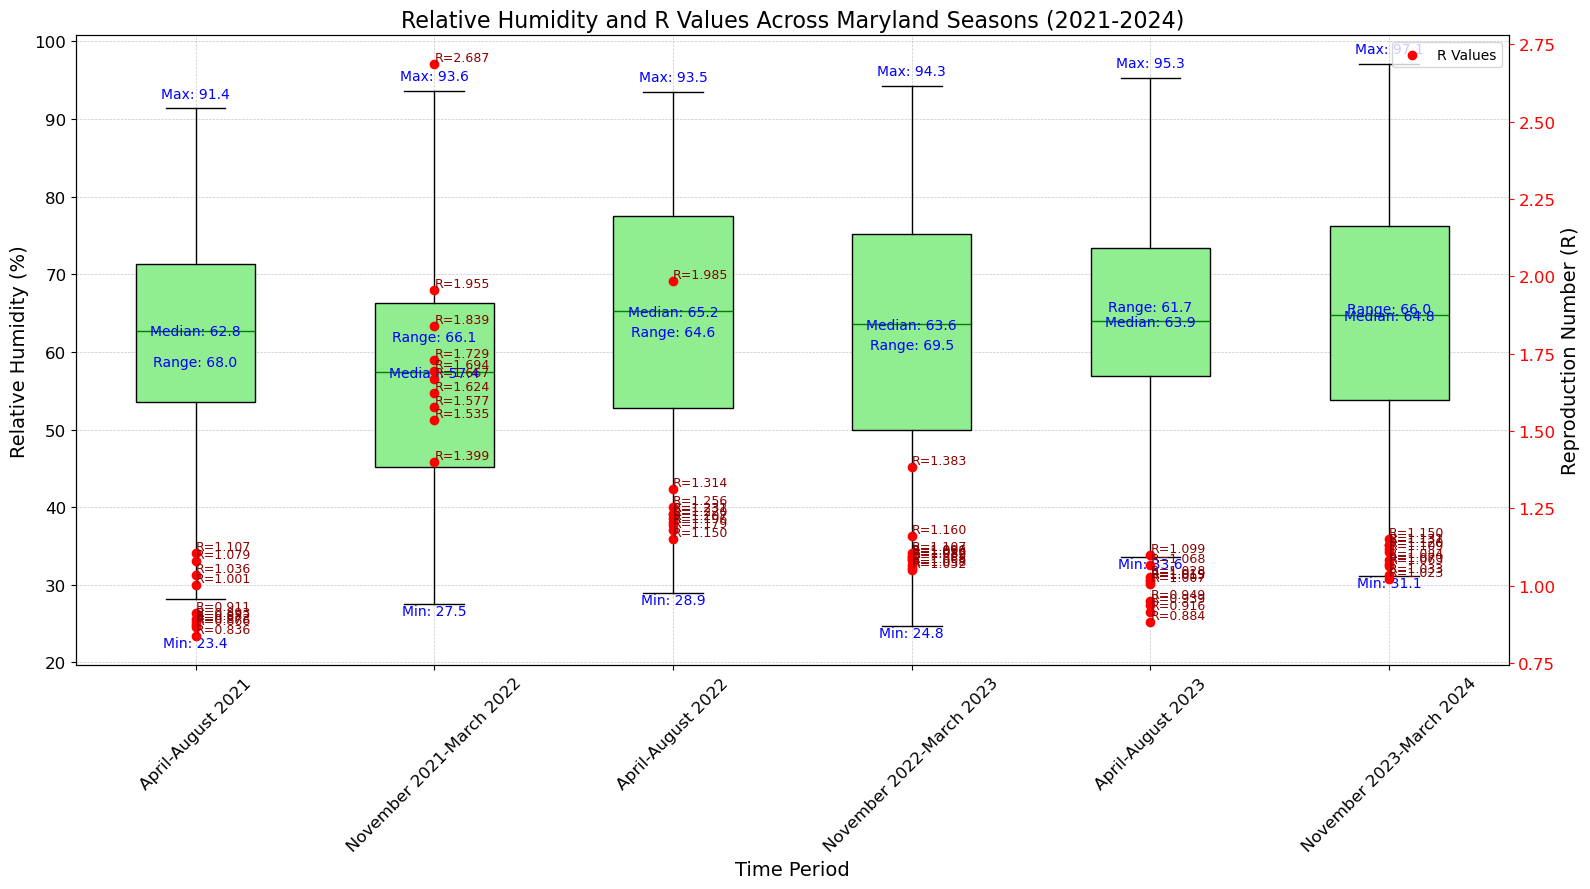

In [9]:
# Plotting
fig, ax1 = plt.subplots(figsize=(16, 9))  # Increased figure size for better visibility

# Boxplots for humidity data
box = ax1.boxplot(
    relative_humidity_lists,
    patch_artist=True,
    labels=labels,
    boxprops=dict(facecolor='lightgreen', color='black'),
    medianprops=dict(color='green'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(markerfacecolor='blue', marker='o', markersize=5)
)
ax1.set_ylabel("Relative Humidity (%)", fontsize=14)
ax1.set_xlabel("Time Period", fontsize=14)
ax1.set_title("Relative Humidity and R Values Across Maryland Seasons (2021-2024)", fontsize=16)
ax1.tick_params(axis='x', rotation=45, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

# Add a grid to the left axis
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Annotate Humidity statistics
for i, stats in enumerate(humidity_statistics):
    x = i + 1  # x-coordinate for the corresponding boxplot
    # Adjust position of median and range to avoid overlap
    ax1.text(x, stats["min"], f'Min: {stats["min"]:.1f}', ha='center', va='top', fontsize=10, color='blue')
    
    # Move the median and range slightly to avoid overlap
    ax1.text(x, stats["median"] -1, f'Median: {stats["median"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')
    ax1.text(x, stats["max"] + 1, f'Max: {stats["max"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')
    ax1.text(x, (stats["min"] + stats["max"]) / 2 + 0.5, f'Range: {stats["range"]:.1f}', ha='center', va='bottom', fontsize=10, color='blue')

# Secondary axis for R values
ax2 = ax1.twinx()
for i, r_vals in enumerate(R_values):
    # Plot R values as orange points for each time period
    x_positions = [i + 1] * len(r_vals)  # Align with boxplot positions
    ax2.scatter(x_positions, r_vals, color='red', label='R Values' if i == 0 else "")

    # Annotate each R value
    for x, y in zip(x_positions, r_vals):
        ax2.text(
            x, y, f'R={y:.3f}',  # Added "R=" prefix to the value
            fontsize=9, 
            color='darkred', 
            ha='left', 
            va='bottom'
        )

ax2.set_ylabel("Reproduction Number (R)", fontsize=14)
ax2.tick_params(axis='y', colors='red', labelsize=12)

# Add grid to the secondary y-axis (optional)
ax2.grid(visible=False)  # Disable grid for R-values to avoid clutter; enable if desired

# Add legends and layout adjustments
ax2.legend(loc='upper right')
plt.tight_layout()

# Save and display the plot
plt.savefig("Humidity_and_R_Values_Larger_Grid.png", dpi=300)
plt.show()

In [10]:
# Combine the predefined lists for summer and winter values
summer_values = summer21_R_values + summer22_R_values + summer23_R_values
winter_values = winter21_R_values + winter22_R_values + winter23_R_values

# Ensure the lists have the same length
if len(summer_values) != len(winter_values):
    raise ValueError("The combined summer and winter lists must have the same length.")

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(summer_values, winter_values)[0, 1]

print(f"The correlation coefficient between summer and winter reproduction values is: {correlation_coefficient:.3f}")


The correlation coefficient between summer and winter reproduction values is: -0.196
